# Ford GoBike dataset analysis
## by Andrés Ingelmo Poveda

## Preliminary Wrangling

This dataset includes informationabout individual rides made in a bike-sharing system covering the greater San Francisco area during the month of February 2019. Questions like "how long does the average trip take" or "how does suscription status impacts in the results" will be answered. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import requests

%matplotlib inline

In [2]:
url = "https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv"
file = "fordgobikedata.csv"

# Function to get the file from the cloud
def get_file(url, file):
    # Get the file from the cloud
    content = requests.get(url).text
    # Write the file into "fordgobikedata.csv"
    with open(file, "w", encoding="utf-8") as f:
        f.write(content)
        
##Run only the first time to get the file from the cloud!
#get_file(url, file) ##<-- Remove "#" to run 

# Load the csv file into a pandas dataframe
ford = pd.read_csv(file)

### What is the structure of your dataset?

In [3]:
ford.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is/are the feature(s) of interest in your dataset?

The main features of interest in the data are:
- `duration_sec`: the main feature of exploration.
- `start_time`and `end_time`: it can provide valuable data regarding the busiest hours.
- `start_station_id` and `end_station_id`: it can provide data regarding the busiest stations.
- `bike_id`: is there any bike that is more used than others?
- `user_type`: it can provide valuable data regarding different behaviours from customers and suscribers.
- `member_birth_year`: are young people using bikesharing more?
- `member_gender`: is gender determinant while bikesharing? is there a different behaviour?

The data needs some cleaning to convert the variables into its correct type. But first, a copy of the original dataframe will be done.

In [33]:
#Create a copy of the original
ford_clean = ford.copy()


#Convert to date/time
ford_clean["start_time"] = pd.to_datetime(ford_clean["start_time"])
ford_clean["end_time"] = pd.to_datetime(ford_clean["end_time"])

#Divide date/time variables in order to plot it correctly
ford_clean["start_time_hour"] = pd.DatetimeIndex(ford_clean["start_time"]).hour
ford_clean["end_time_hour"] = pd.DatetimeIndex(ford_clean["end_time"]).hour

#Get day of the week for the start an end time.
ford_clean["start_time_weekday"] = ford_clean["start_time"].dt.dayofweek
ford_clean["end_time_weekday"] = ford_clean["end_time"].dt.dayofweek

#Convert day of the week to string
week_dict = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}

ford_clean["start_time_weekday"].replace(week_dict, inplace=True)
ford_clean["end_time_weekday"].replace(week_dict, inplace=True)

#Convert to strings as not calculations are required for the data below
to_clean = ["start_station_id", "end_station_id", "bike_id"]

for i in to_clean:
    ford_clean[i] = ford_clean[i].fillna(0).astype(int).astype(str) 

#Convert year of birth to int
ford_clean["member_birth_year"] = ford_clean["member_birth_year"].fillna(0).astype(int)
    
#Convert to categorical values
ford_clean["member_gender"] = ford_clean["member_gender"].astype("category")
ford_clean["user_type"] = ford_clean["user_type"].astype("category")

    
#Drop Columns not necessary for the analysis
ford_clean.drop(labels=["start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude"], axis=1, inplace=True);

In [34]:
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183412 non-null  object        
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  object        
 8   user_type                183412 non-null  category      
 9   member_birth_year        183412 non-null  int32         
 10  member_gender            175147 non-null  category      
 11  bike_share_for_all_trip  183412 non-null  object        
 12  start_time_hour 

In [35]:
ford_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_hour,end_time_hour,start_time_weekday,end_time_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,No,17,8,Thursday,Friday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,0,NaN,No,18,6,Thursday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,12,5,Thursday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,No,17,4,Thursday,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,23,0,Thursday,Friday


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [36]:
#Set color
base_color = sb.color_palette()[0]

#Set Week Order
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

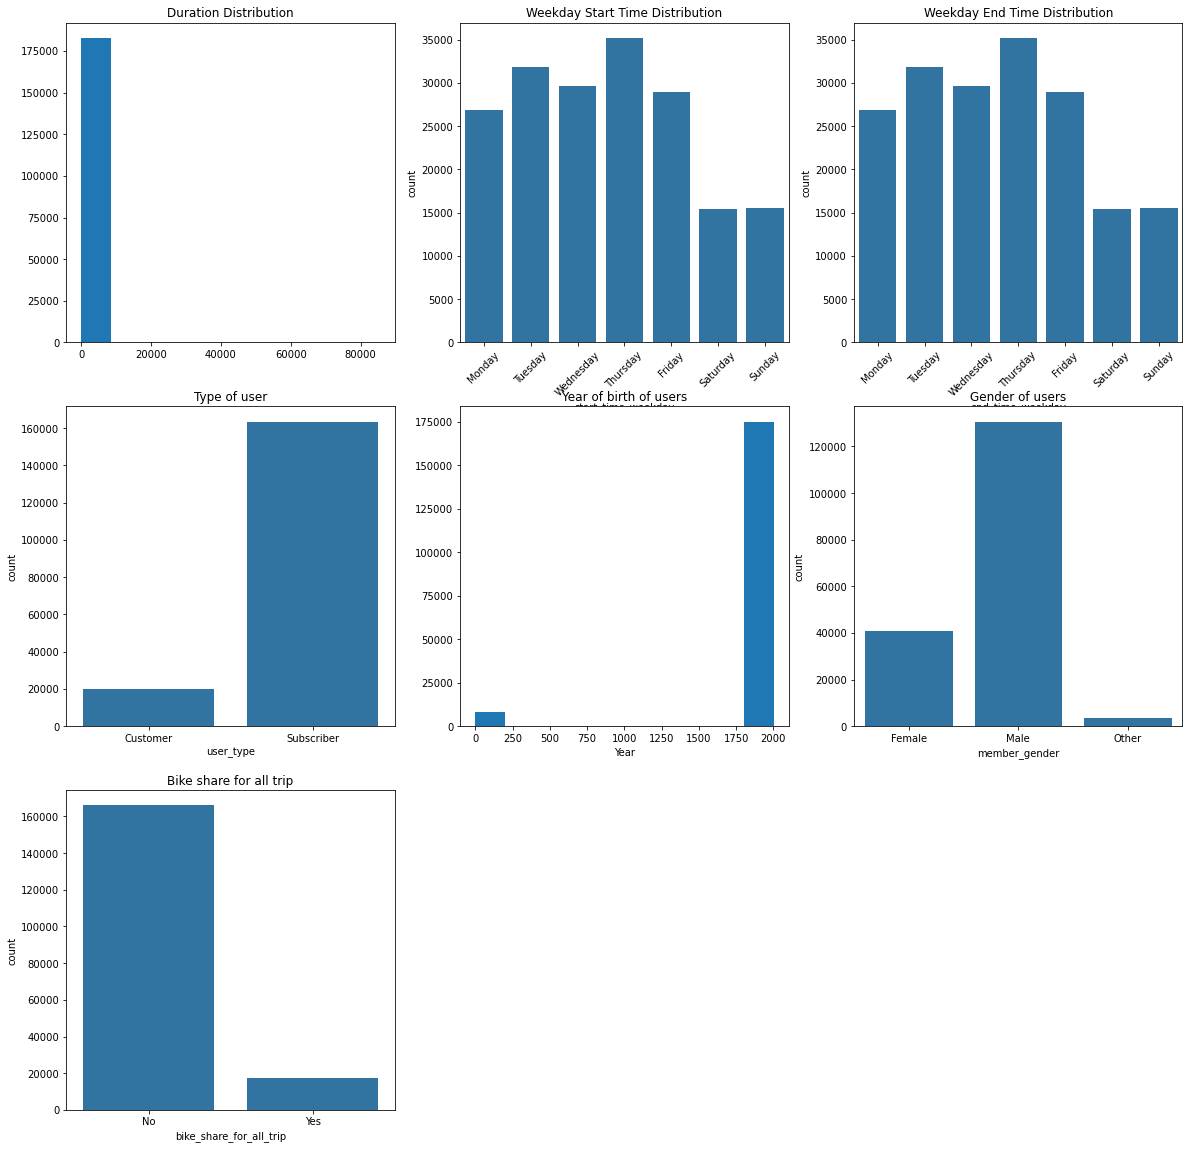

In [37]:
plt.figure(figsize=[20,20])

#Duration plot
plt.subplot(3,3,1)
plt.hist(ford_clean["duration_sec"])
plt.title("Duration Distribution");

#Weekday start plot
plt.subplot(3,3,2)
sb.countplot(data=ford_clean, x="start_time_weekday", order=week_order, color=base_color)
plt.xticks(rotation=45)
plt.title("Weekday Start Time Distribution");

#Weekday end plot
plt.subplot(3,3,3)
sb.countplot(data=ford_clean, x="end_time_weekday", order=week_order, color=base_color)
plt.xticks(rotation=45)
plt.title("Weekday End Time Distribution");

#User type plot
plt.subplot(3,3,4)
sb.countplot(data=ford_clean, x="user_type", color=base_color)
plt.title("Type of user");

#Year of birth plot
plt.subplot(3,3,5)
plt.hist(ford_clean["member_birth_year"])
plt.title("Year of birth of users")
plt.xlabel("Year");

#Gender of member plot
plt.subplot(3,3,6)
sb.countplot(data=ford_clean, x="member_gender", color=base_color)
plt.title("Gender of users");

#Bike sharing plot
plt.subplot(3,3,7)
sb.countplot(data=ford_clean, x="bike_share_for_all_trip", color=base_color)
plt.title("Bike share for all trip");


After plotting all interesting variables together, two of them need to be reploted: the distribution for duration and the year of birth of users.

Starting with the **distribution duration**. As we can see below, the chart does not give any visual advantage of the variable:

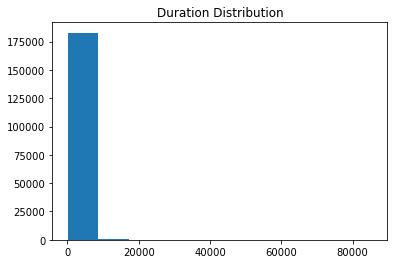

In [38]:
plt.hist(ford_clean["duration_sec"])
plt.title("Duration Distribution");

To make it more visual, a smaller binsize of 60 seconds (1 minute) has been ploted. Because, there are some values around 80000 seconds that make the visualization not good, a limit to 3600 seconds (1 hour) should be enough to start noticing some differences.

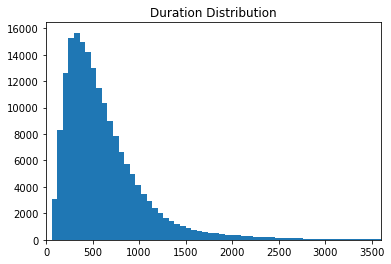

In [39]:
binsize = 60
bins = np.arange(0, ford_clean["duration_sec"].max(), binsize)

plt.hist(ford_clean["duration_sec"], bins=bins)
plt.title("Duration Distribution")
plt.xlim([0,3600]);

In [87]:
ford_clean = ford_clean[ford_clean["duration_sec"] <= 3600]

Now we can clearly draw some conclussions from the histogram like the median time people rent the bike: around 500 seconds (8.5 minutes). All observations with values above 3600 seconds were  dropped to ensure the consistency of the analysis.

Following with the **year of birth of users**, a modification is needed as well because we cannot draw any conclusion. All the missing values were filled with a 0 and the plot shows it:

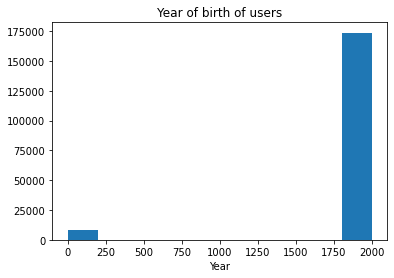

In [88]:
plt.hist(ford_clean["member_birth_year"])
plt.title("Year of birth of users")
plt.xlabel("Year");

Like the duration distribution, we will set a binsize of 1 to get more accuracy. Also, limits will be plotted around 1925.

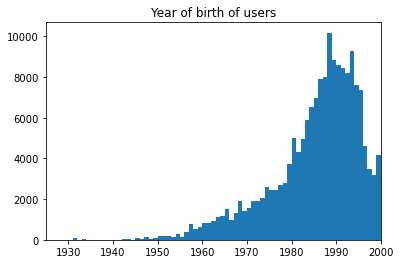

In [90]:
binsize = 1
bins = np.arange(ford_clean["member_birth_year"].min(), ford_clean["member_birth_year"].max(), binsize)

plt.hist(ford_clean["member_birth_year"], bins=bins)
plt.title("Year of birth of users")
plt.xlim(1925,2000);

In this case, we can clearly see that the most amount of people have been boorn between 1980 and 2000. Lets zoom in to find out.

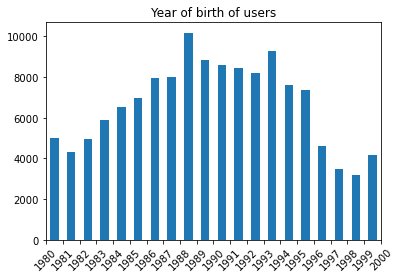

In [93]:
#Set a list from 1980 to 2000 every year
list = []
count = 1980

for i in range(21):
    list.append(count + i)
    
#Set the bins
binsize = 1
bins = np.arange(ford_clean["member_birth_year"].min(), ford_clean["member_birth_year"].max(), binsize)

#Plot the histogram
plt.hist(data=ford_clean, x="member_birth_year", bins=bins, rwidth=0.5)
plt.title("Year of birth of users")
plt.xlim([1980,2000])
plt.xticks(ticks=list, labels=list, rotation=45);

Now, it is clearly visible that the most common year of birth between users of the platform is 1988.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In the **duration distribution**, a few anomalies were discovered. Some values were around 80,000 seconds which seems fairly unusual to rent a bike. They are probably misscalulations.

In the **year of birth distribution** the values that were missing and filled with a 0 were causing some problems.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

For the first problem, all the values above 3600 were dropped. The significance on the whole dataset is minimum as the frequency is so low. This way, we can assure more consistency in our data.

For the second problem, no transformation on the data was required, just for the plotting.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!